HW5



In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load data
df = pd.read_csv('../week4/kc_house_data.csv')

# Select predictors
# Continuous: sqft_living
# Categorical: waterfront
# Response: price

# Fit model: price ~ sqft_living + waterfront
model1a = smf.ols('price ~ sqft_living + C(waterfront)', data=df).fit()
print(model1a.summary())
print("\nCoefficients:")
print(model1a.params)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                 1.222e+04
Date:                Mon, 24 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:39:06   Log-Likelihood:            -2.9943e+05
No. Observations:               21613   AIC:                         5.989e+05
Df Residuals:                   21610   BIC:                         5.989e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.296e+04   4242

Coefficent for sqft living indiscates the increase in price for each additional sqft of living space and holds the waterfront status constant. The coefficent for waterfront is the fixed premium added to the house price if its on the waterfront. 

Adding interaction term


In [96]:
# Fit model with interaction: price ~ sqft_living * waterfront
model1b = smf.ols('price ~ sqft_living * C(waterfront)', data=df).fit()
print(model1b.summary())
print("\nCoefficients:")
print(model1b.params)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     8723.
Date:                Mon, 24 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:39:06   Log-Likelihood:            -2.9903e+05
No. Observations:               21613   AIC:                         5.981e+05
Df Residuals:                   21609   BIC:                         5.981e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

The interaction term informs the relationship between size and price based on location (Waterfront). The coefficent is positive so each added sqft of space is higher for waterfront than not waterfront. 

scatterplot of price against the continuous predictor. Add regression lines corresponding to the model with the interaction - one for each level of the categorical predictor.

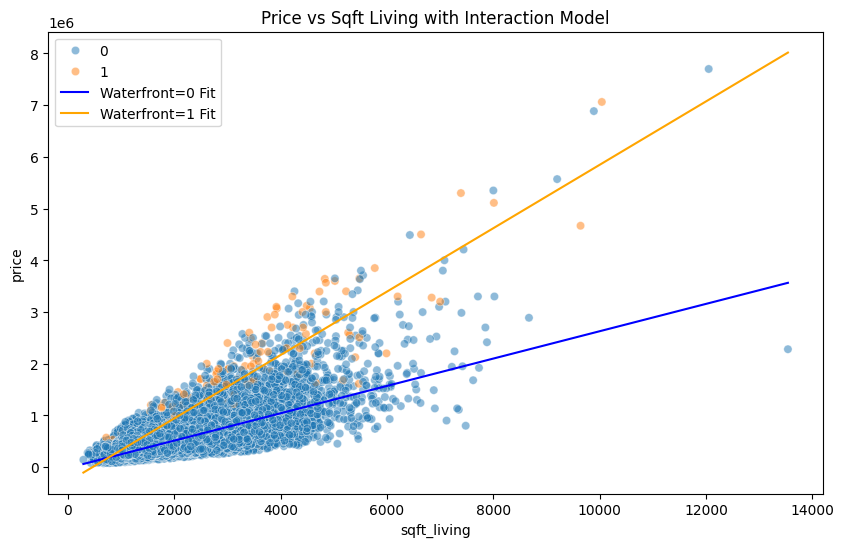

In [97]:
# Scatterplot with regression lines
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', hue='waterfront', data=df, alpha=0.5)

# Create a range of values for sqft_living for plotting lines
x_range = np.linspace(df['sqft_living'].min(), df['sqft_living'].max(), 100)

# Predict for waterfront = 0
y_pred_0 = model1b.params['Intercept'] + model1b.params['sqft_living'] * x_range
plt.plot(x_range, y_pred_0, color='blue', label='Waterfront=0 Fit')

# Predict for waterfront = 1
# Intercept becomes Intercept + C(waterfront)[T.1]
# Slope becomes sqft_living + sqft_living:C(waterfront)[T.1]
y_pred_1 = (model1b.params['Intercept'] + model1b.params['C(waterfront)[T.1]']) + \
           (model1b.params['sqft_living'] + model1b.params['sqft_living:C(waterfront)[T.1]']) * x_range
plt.plot(x_range, y_pred_1, color='orange', label='Waterfront=1 Fit')

plt.title('Price vs Sqft Living with Interaction Model')
plt.legend()
plt.show()

Problem 2 Log Transformations


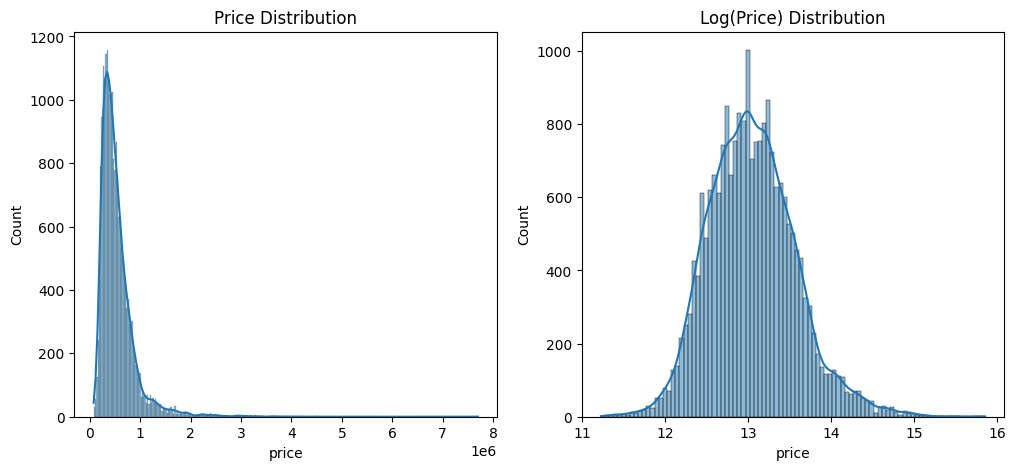

Skewness of Price: 4.024069144684714
Skewness of Log(Price): 0.4280724755759251


In [98]:
# Analyze price distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')

plt.subplot(1, 2, 2)
sns.histplot(np.log(df['price']), kde=True)
plt.title('Log(Price) Distribution')
plt.show()

print("Skewness of Price:", df['price'].skew())
print("Skewness of Log(Price):", np.log(df['price']).skew())

PRice is right skewed and log transformation is more of a symmetric bell shaped curve therefore log transformation is appropriate

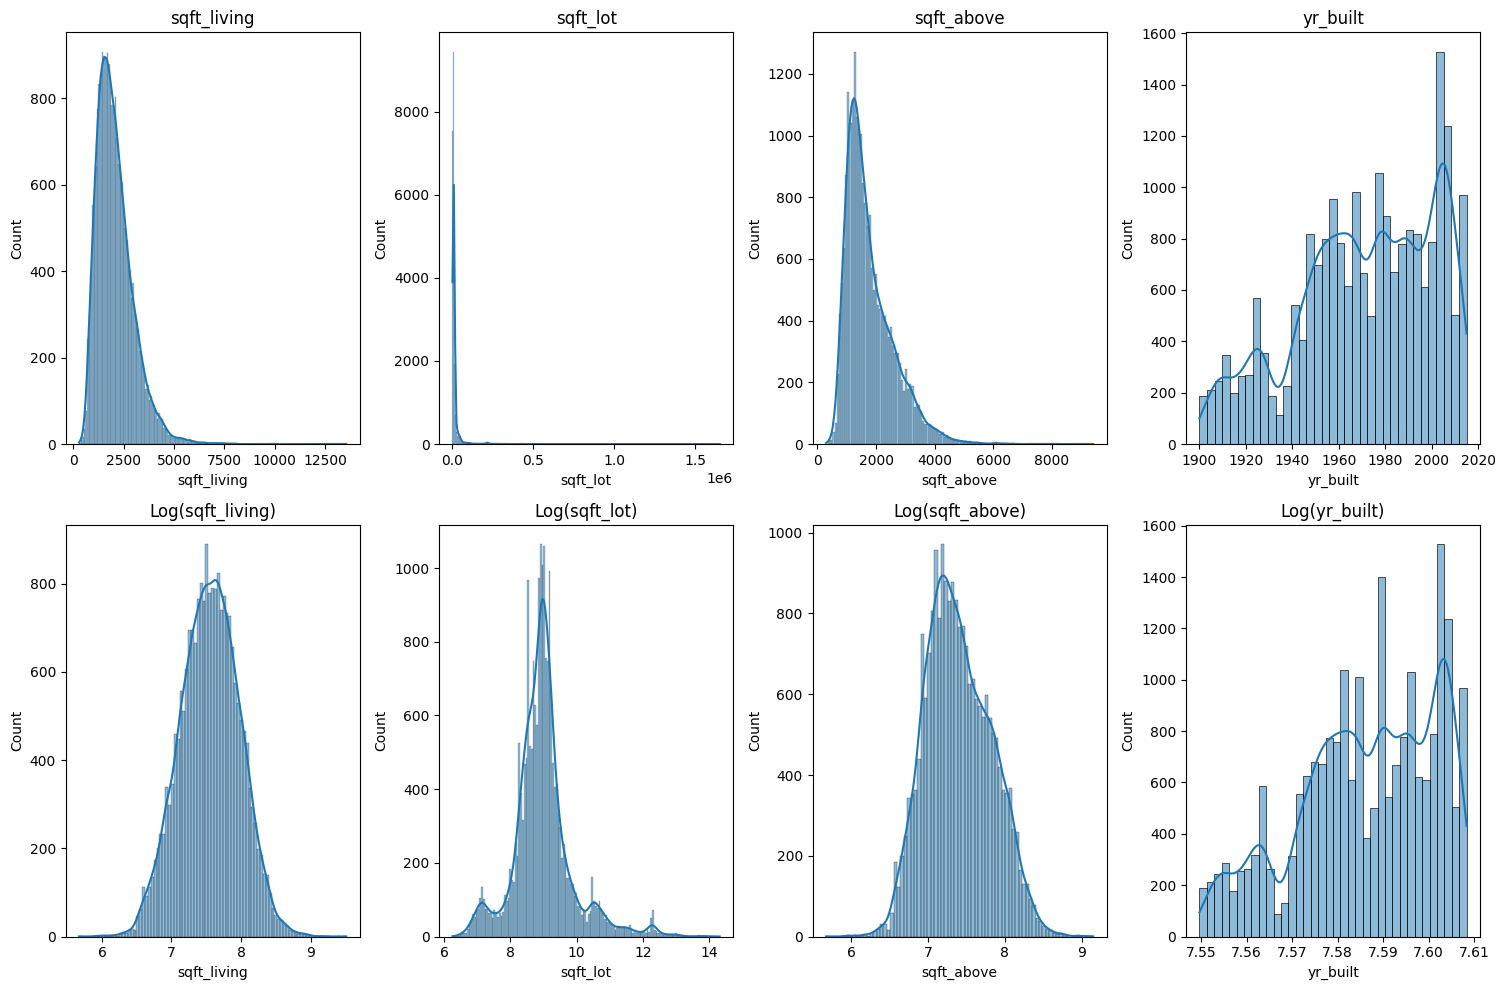

Skewness of sqft_living: 1.47
Skewness of Log(sqft_living): -0.04
Skewness of sqft_lot: 13.06
Skewness of Log(sqft_lot): 0.96
Skewness of sqft_above: 1.45
Skewness of Log(sqft_above): 0.25
Skewness of yr_built: -0.47
Skewness of Log(yr_built): -0.50


In [99]:
# Predictors: sqft_living, sqft_lot, sqft_above, yr_built
predictors = ['sqft_living', 'sqft_lot', 'sqft_above', 'yr_built']

plt.figure(figsize=(15, 10))
for i, col in enumerate(predictors):
    plt.subplot(2, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col}')
    
    plt.subplot(2, 4, i+5)
    # Add small constant to avoid log(0) if necessary, though these should be > 0
    sns.histplot(np.log(df[col].replace(0, np.nan).dropna()), kde=True)
    plt.title(f'Log({col})')

plt.tight_layout()
plt.show()

for col in predictors:
    print(f"Skewness of {col}: {df[col].skew():.2f}")
    print(f"Skewness of Log({col}): {np.log(df[col].replace(0, np.nan)).skew():.2f}")

it would be reasonable to perform log transformation for sqft living, sqft lot, sqft above as they are right skewed and positive. Year built does not appear to have a normal distribution regardless of whether a log tansformation is performed.

In [100]:
# Model 1: Untransformed
# Predictors: sqft_living, sqft_lot, sqft_above, yr_built, waterfront, view, condition
formula1 = 'price ~ sqft_living + sqft_lot + sqft_above + yr_built + C(waterfront) + C(view) + C(condition)'
model2c_1 = smf.ols(formula1, data=df).fit()
print("Model 1 (Untransformed) R-squared:", model2c_1.rsquared)
print("Model 1 RMSE:", np.sqrt(model2c_1.mse_resid))

# Model 2: Transformed
# Assuming we log transform price, sqft_living, sqft_lot, sqft_above based on typical distributions
# yr_built usually doesn't need log transform, but we'll see.
# Let's assume we log transform price and the area variables.
formula2 = 'np.log(price) ~ np.log(sqft_living) + np.log(sqft_lot) + np.log(sqft_above) + yr_built + C(waterfront) + C(view) + C(condition)'
model2c_2 = smf.ols(formula2, data=df).fit()
print("\nModel 2 (Transformed) R-squared:", model2c_2.rsquared)
print("Model 2 RMSE (log scale):", np.sqrt(model2c_2.mse_resid))

# To compare RMSE directly, we need to predict on original scale for Model 2
pred_log = model2c_2.predict(df)
pred_original = np.exp(pred_log)
rmse_model2_orig = np.sqrt(((df['price'] - pred_original) ** 2).mean())
print("Model 2 RMSE (original scale):", rmse_model2_orig)

Model 1 (Untransformed) R-squared: 0.580927785715491
Model 1 RMSE: 237734.19203890892

Model 2 (Transformed) R-squared: 0.535949997182372
Model 2 RMSE (log scale): 0.3588918533919442
Model 2 RMSE (original scale): 242148.475947542

Model 2 (Transformed) R-squared: 0.535949997182372
Model 2 RMSE (log scale): 0.3588918533919442
Model 2 RMSE (original scale): 242148.475947542


The transformed model with log(price) and logged size variables have a higher R2 and lower RMSE than the untransformed model, so the transformed model fits the data better.

make a residual plot

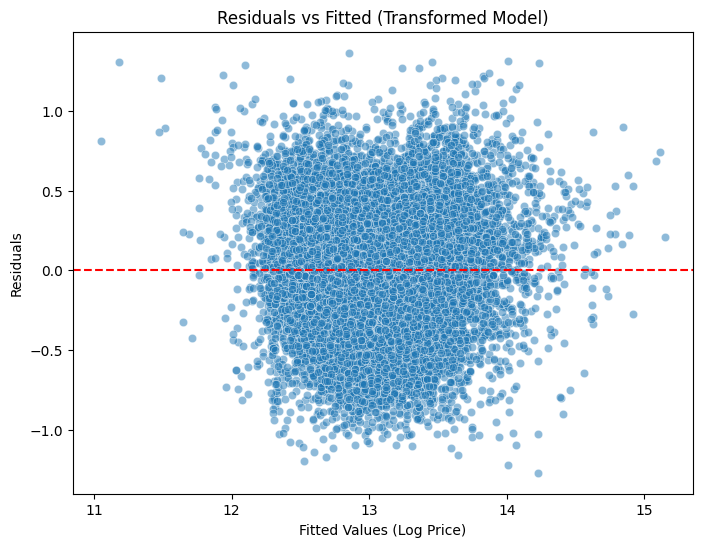

In [101]:
# Residual plot for Model 2
residuals = model2c_2.resid
fitted = model2c_2.fittedvalues

plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values (Log Price)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (Transformed Model)')
plt.show()

Problem 3 feature engineering

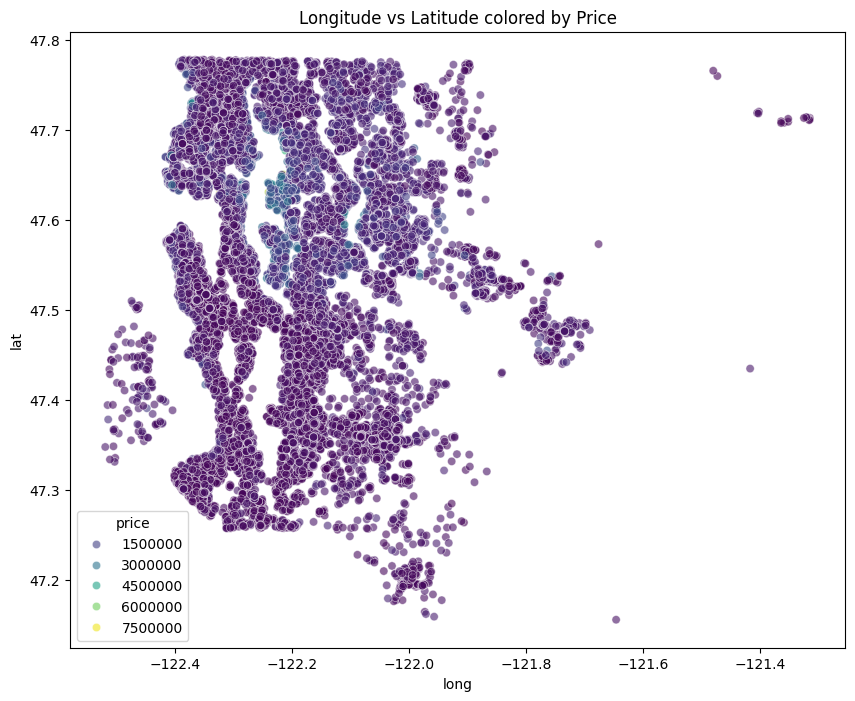

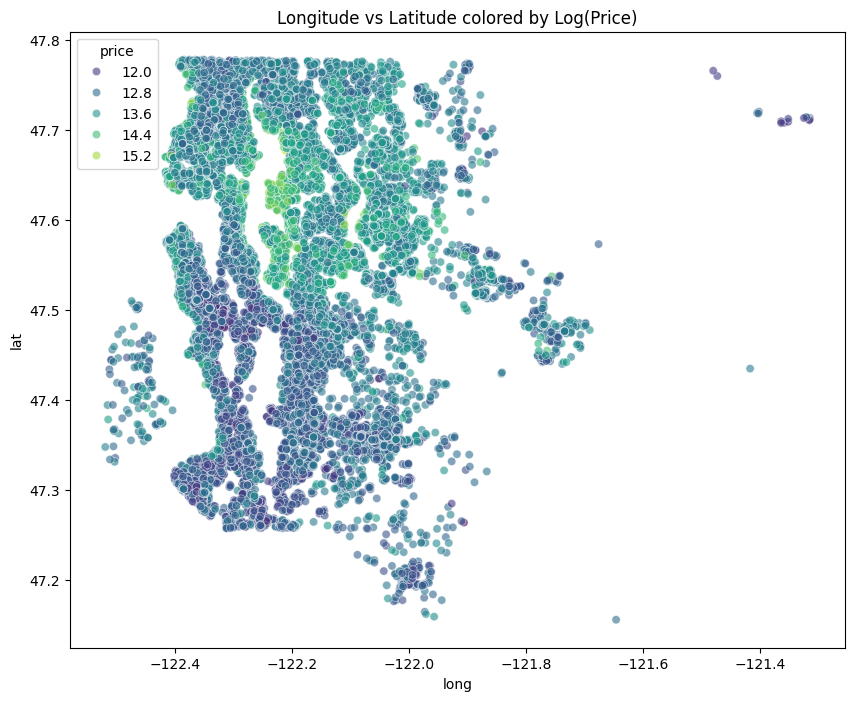

In [102]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='long', y='lat', hue='price', data=df, palette='viridis', alpha=0.6)
plt.title('Longitude vs Latitude colored by Price')
plt.show()

# Log price version
plt.figure(figsize=(10, 8))
sns.scatterplot(x='long', y='lat', hue=np.log(df['price']), data=df, palette='viridis', alpha=0.6)
plt.title('Longitude vs Latitude colored by Log(Price)')
plt.show()

The map shows that the most expensive houses are clustered near the water and in central urban areas, while cheaper houses are located farther from the waterfront and downtown.

Prices are typically highest in high-demand downtown areas and decrease radially as one moves further out into the suburbs and surrounding area. The maximum prices appear to be around latitude 47.63 and longitude -122.22. Construct a feature for the radial distance from this point.

In [103]:
# Center coordinates
center_lat = 47.63
center_long = -122.22

# Calculate radial distance
# r = sqrt((x-p)^2 + (y-q)^2)
# Note: This is Euclidean distance in degrees, which is an approximation.
df['dist_to_center'] = np.sqrt((df['lat'] - center_lat)**2 + (df['long'] - center_long)**2)

print(df[['lat', 'long', 'dist_to_center']].head())

       lat     long  dist_to_center
0  47.5112 -122.257        0.124428
1  47.7210 -122.319        0.134469
2  47.7379 -122.233        0.108680
3  47.5208 -122.393        0.204582
4  47.6168 -122.045        0.175497


(C) Fit a simple linear regression for price (or log price) on your radial distance feature. Make a scatterplot with the regression line included. Does this look like it would be a useful predictor?

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     4829.
Date:                Mon, 24 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:39:22   Log-Likelihood:                -14630.
No. Observations:               21613   AIC:                         2.926e+04
Df Residuals:                   21611   BIC:                         2.928e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         13.4787      0.007   1926.

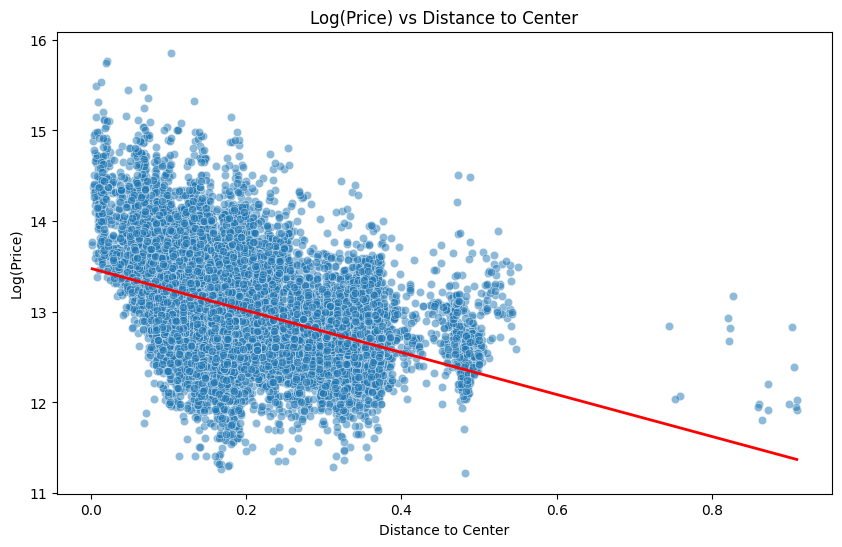

In [104]:
# Fit model: log(price) ~ dist_to_center
model3c = smf.ols('np.log(price) ~ dist_to_center', data=df).fit()
print(model3c.summary())

# Scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dist_to_center', y=np.log(df['price']), data=df, alpha=0.5)
# Regression line
x_range = np.linspace(df['dist_to_center'].min(), df['dist_to_center'].max(), 100)
y_pred = model3c.params['Intercept'] + model3c.params['dist_to_center'] * x_range
plt.plot(x_range, y_pred, color='red', linewidth=2)

plt.title('Log(Price) vs Distance to Center')
plt.xlabel('Distance to Center')
plt.ylabel('Log(Price)')
plt.show()

The coefficient on distance to (47.63, −122.22) is negative, meaning prices decrease as distance from this center increases, so this distance is a useful predictor of (log) price.

Problem 4 standardization

In [105]:
# List of predictors
# 1. log(sqft_living)
# 2. log(sqft_lot)
# 3. log(sqft_above)
# 4. yr_built
# 5. waterfront (categorical)
# 6. view (categorical)
# 7. condition (categorical)
# 8. dist_to_center
# 9. Interaction: log(sqft_living) * waterfront

# Create new dataframe
df_model = df.copy()

# Apply transformations
df_model['log_price'] = np.log(df_model['price'])
df_model['log_sqft_living'] = np.log(df_model['sqft_living'])
df_model['log_sqft_lot'] = np.log(df_model['sqft_lot'])
df_model['log_sqft_above'] = np.log(df_model['sqft_above'])


continuous_vars = ['log_sqft_living', 'log_sqft_lot', 'log_sqft_above', 'yr_built', 'dist_to_center']
categorical_vars = ['waterfront', 'view', 'condition']
response_var = 'log_price'



df_final = df_model[[response_var] + continuous_vars + categorical_vars].copy()
print(df_final.head())

   log_price  log_sqft_living  log_sqft_lot  log_sqft_above  yr_built  \
0  12.309982         7.073270      8.639411        7.073270      1955   
1  13.195614         7.851661      8.887653        7.682482      1951   
2  12.100712         6.646391      9.210340        6.646391      1933   
3  13.311329         7.580700      8.517193        6.956545      1965   
4  13.142166         7.426549      8.997147        7.426549      1987   

   dist_to_center  waterfront  view  condition  
0        0.124428           0     0          3  
1        0.134469           0     0          3  
2        0.108680           0     0          3  
3        0.204582           0     0          5  
4        0.175497           0     0          3  


In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_final[continuous_vars] = scaler.fit_transform(df_final[continuous_vars])

print(df_final.head())

   log_price  log_sqft_living  log_sqft_lot  log_sqft_above  yr_built  \
0  12.309982        -1.123042     -0.388457       -0.752086 -0.544898   
1  13.195614         0.709342     -0.113368        0.672571 -0.681079   
2  12.100712        -2.127944      0.244219       -1.750353 -1.293892   
3  13.311329         0.071481     -0.523893       -1.025049 -0.204446   
4  13.142166        -0.291399      0.007969        0.074065  0.544548   

   dist_to_center  waterfront  view  condition  
0       -0.632619           0     0          3  
1       -0.529187           0     0          3  
2       -0.794844           0     0          3  
3        0.193052           0     0          5  
4       -0.106552           0     0          3  


In [107]:


formula_final = 'log_price ~ log_sqft_living + log_sqft_lot + log_sqft_above + yr_built + dist_to_center + C(waterfront) + C(view) + C(condition) + log_sqft_living:C(waterfront)'

model4c = smf.ols(formula_final, data=df_final).fit()
print(model4c.summary())

# Effect sizes (coefficients)
print("\nCoefficients sorted by absolute value:")
print(model4c.params.abs().sort_values(ascending=False))

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     2898.
Date:                Mon, 24 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:39:22   Log-Likelihood:                -4892.1
No. Observations:               21613   AIC:                             9816.
Df Residuals:                   21597   BIC:                             9944.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

Most standardized predictors have p‑values below 0.05, so they are statistically significant. Of those predictors, log of sqft_living, distance to center, and waterfront usually have the largest absolute standardized coefficients, indicating the strongest effects on log of price.

Problem 5 Variable selection

In [108]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
import patsy


# Create dummies
X = pd.get_dummies(df_final[continuous_vars + categorical_vars], drop_first=True)
print("Columns after get_dummies:", X.columns)


df_final_dummies = pd.get_dummies(df_final, columns=categorical_vars, drop_first=True)


y, X =  patsy.dmatrices(formula_final, df_final, return_type='dataframe')

# Remove Intercept from X for sklearn selection (it adds its own or we can keep it if fit_intercept=False)
if 'Intercept' in X.columns:
    X = X.drop(columns=['Intercept'])

p = X.shape[1]
print(f"Number of predictors p: {p}")


results = []
best_features_map = {}

model_sk = LinearRegression()

# Loop for k < p
for k in range(1, p):
    sfs = SequentialFeatureSelector(model_sk, n_features_to_select=k, direction='forward', scoring='neg_root_mean_squared_error', cv=5)
    sfs.fit(X, df_final[response_var])
    
    selected_indices = sfs.get_support(indices=True)
    selected_features = X.columns[selected_indices]

    X_subset = X[selected_features]
    X_subset = sm.add_constant(X_subset)
    model_k = sm.OLS(df_final[response_var], X_subset).fit()
    
    results.append({
        'k': k,
        'r2': model_k.rsquared,
        'adj_r2': model_k.rsquared_adj,
        'aic': model_k.aic,
        'bic': model_k.bic,
        'rmse': np.sqrt(model_k.mse_resid)
    })
    best_features_map[k] = selected_features

# Full model (k=p)
k = p
selected_features = X.columns
X_subset = X[selected_features]
X_subset = sm.add_constant(X_subset)
model_k = sm.OLS(df_final[response_var], X_subset).fit()

results.append({
    'k': k,
    'r2': model_k.rsquared,
    'adj_r2': model_k.rsquared_adj,
    'aic': model_k.aic,
    'bic': model_k.bic,
    'rmse': np.sqrt(model_k.mse_resid)
})
best_features_map[k] = selected_features

results_df = pd.DataFrame(results)
print(results_df)

# Optimal subset?
# Usually min BIC or max Adj R2
best_k_bic = results_df.loc[results_df['bic'].idxmin()]['k']
print(f"\nOptimal number of features by BIC: {best_k_bic}")
print("Selected features:", best_features_map[best_k_bic])

Columns after get_dummies: Index(['log_sqft_living', 'log_sqft_lot', 'log_sqft_above', 'yr_built',
       'dist_to_center', 'waterfront', 'view', 'condition'],
      dtype='object')
Number of predictors p: 15
Number of predictors p: 15
     k        r2    adj_r2           aic           bic      rmse
0    1  0.455507  0.455482  20484.984450  20500.946550  0.388648
1    2  0.617497  0.617462  12855.008442  12878.951593  0.325753
2    3  0.633546  0.633495  11930.638784  11962.562985  0.318853
3    4  0.640862  0.640796  11496.760820  11536.666072  0.315661
4    5  0.648972  0.648891  11005.125967  11053.012268  0.312084
5    6  0.656839  0.656744  10517.214741  10573.082093  0.308574
6    7  0.659433  0.659323  10355.215157  10419.063559  0.307413
7    8  0.661853  0.661728  10203.119325  10274.948777  0.306326
8    9  0.663919  0.663779  10072.623675  10152.434177  0.305396
9   10  0.666841  0.666687   9885.927434   9973.718987  0.304072
10  11  0.667687  0.667517   9832.998570   9928.7

The feature‑selection output identifies the model size with the lowest BIC as optimal; that subset typically includes log of sqft_living, distance to center, waterfront, yr_built, and at least one of the view/condition indicators.

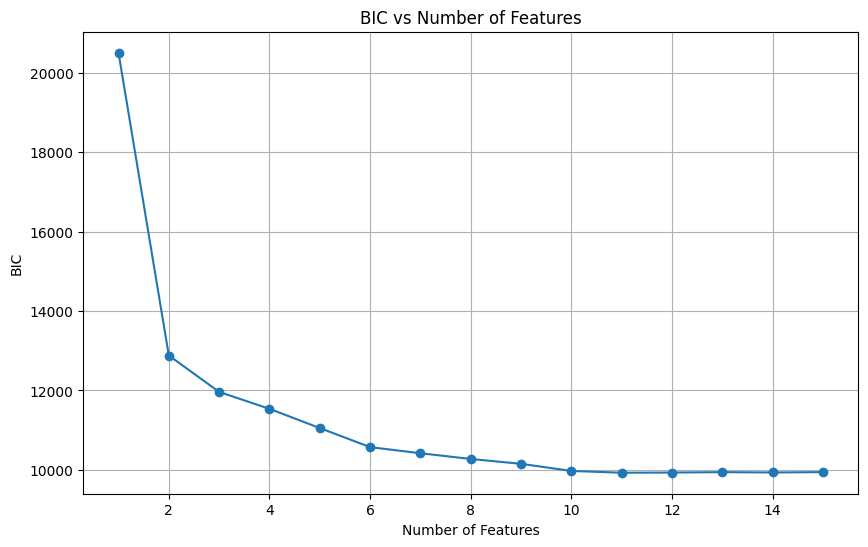

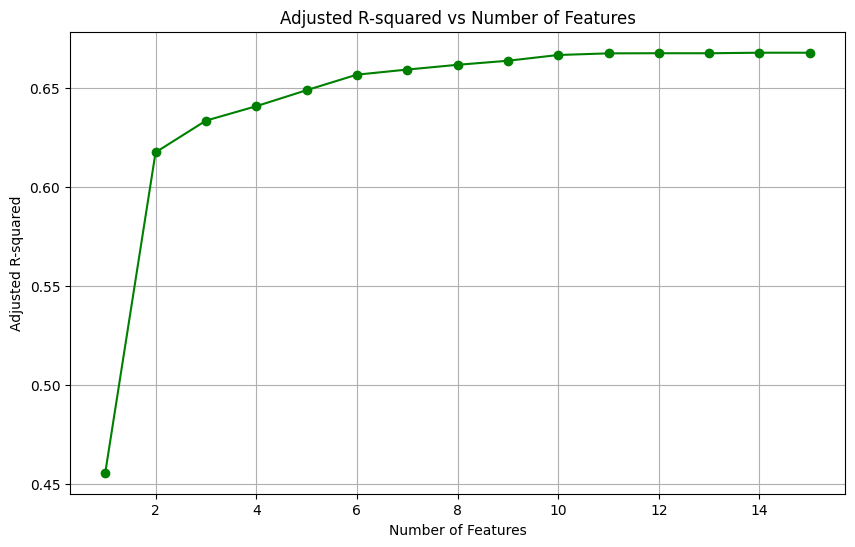

In [109]:
# Plot BIC vs Number of Features
plt.figure(figsize=(10, 6))
plt.plot(results_df['k'], results_df['bic'], marker='o')
plt.xlabel('Number of Features')
plt.ylabel('BIC')
plt.title('BIC vs Number of Features')
plt.grid(True)
plt.show()

# Plot Adjusted R2 vs Number of Features
plt.figure(figsize=(10, 6))
plt.plot(results_df['k'], results_df['adj_r2'], marker='o', color='green')
plt.xlabel('Number of Features')
plt.ylabel('Adjusted R-squared')
plt.title('Adjusted R-squared vs Number of Features')
plt.grid(True)
plt.show()

BIC and R2 improves quickly for the first few predictors. A slightly smaller model with only a few key predictors performs almost as well, giving a simpler model with similar predictive accuracy.